## Predict Tinder Matches

We are going to make a recommender algorithm that recommends profiles to people based on their similar interests so we will aim to predict the profiles to the user such that the user finds it most interesting out of all and tries to connect with them

Reference: https://www.geeksforgeeks.org/predict-tinder-matches-with-machine-learning/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tinder_data = pd.read_csv("../data/tinder_data.csv")

In [3]:
type(tinder_data)

pandas.core.frame.DataFrame

In [4]:
tinder_data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,same city


In [5]:
tinder_data.shape

(2001, 20)

In [6]:
tinder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

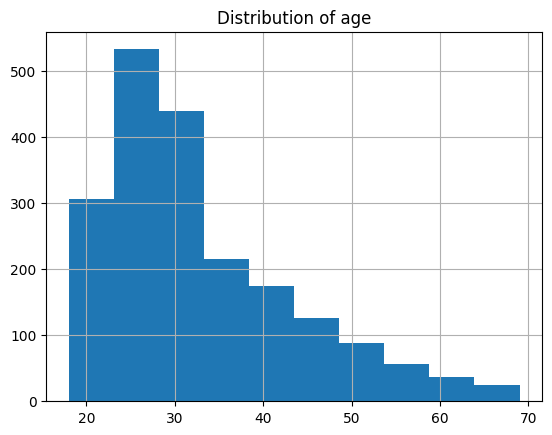

In [7]:
# get to the know the data
# distribution of age

tinder_data.age.hist()
plt.title("Distribution of age");


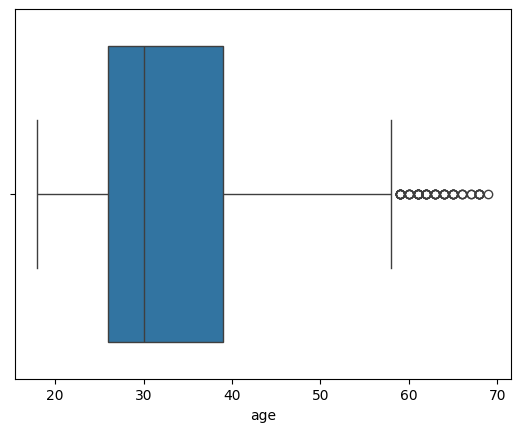

In [8]:
sns.boxplot(x=tinder_data.age);

# ages above 60 are considered outliers - we may consider filtering based on age

In [9]:
# distribution of status

tinder_data.status.value_counts()

status
single            1867
available           66
seeing someone      54
married             14
Name: count, dtype: int64

In [10]:

tinder_data.status.value_counts(normalize=True)

status
single            0.933033
available         0.032984
seeing someone    0.026987
married           0.006997
Name: proportion, dtype: float64

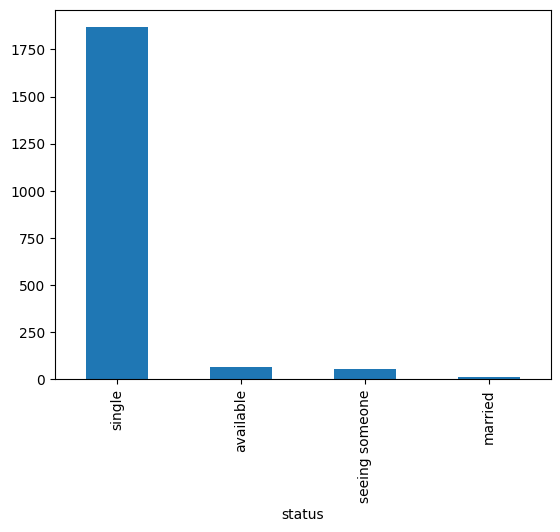

In [11]:
tinder_data.status.value_counts().plot(kind='bar');

In [12]:
# the bio for the 6th profile

tinder_data.bio[5]

"my self-summary..well i'm not very good at this, so lets give it a try..i can be really shy but outgoing once i warm up to the person or situation. would say that life is good..it has its ups and downs but that's what makes life interesting. i love to have fun but also love just relaxing..i'm a little clumsy but i always put all of it. i enjoy listening to all sorts of music and watching movies...to be continued"

In [13]:
# the bio for the 1st profile

tinder_data.bio[0]

"bottom line i love life! i work hard and i love hard! i'm down to earth... drama free and plan to keep it that way... if you want to know more about me just ask! i'm a woman with loves other women!. sometimes you feel like a nut sometimes you don't... i have a femme side and a butch side. i love trying new things. i spend my day helping people so i can check that off the list. i'm very out going and i love making people laugh! i'm open to meeting new people and dating. at this point i'm taking care of my heart and not rushing anything. i value communication and being open-minded."

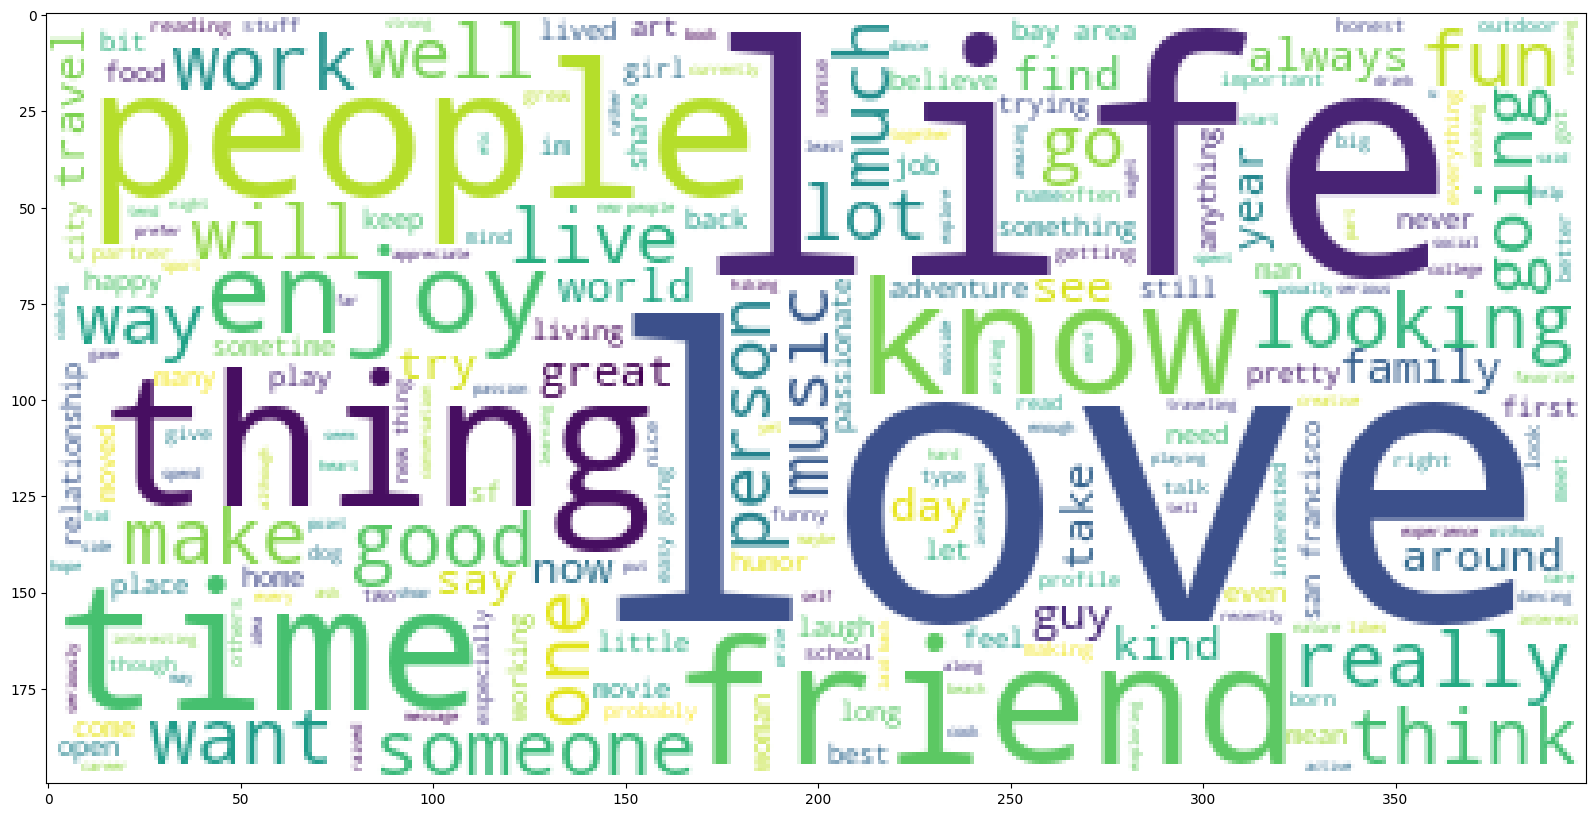

In [14]:
# view the most appearing words

import re
from wordcloud import WordCloud

# Remove punctuation
tinder_data['bio_proc'] = \
tinder_data['bio'].map(lambda x: re.sub('[,.!?]', '', x))

# Convert all the words to lowercase
tinder_data['bio_proc'] = \
tinder_data['bio_proc'].map(lambda x: x.lower())


# Join the different processed bios together.
long_string = ','.join(list(tinder_data['bio_proc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show();

In [15]:
# check for missing data

tinder_data.isnull().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
location_preference    0
bio_proc               0
dtype: int64

In [16]:
# check for duplicate data

tinder_data.duplicated().sum()

0

In [17]:
tinder_data.orientation.value_counts(normalize=True)

orientation
straight    0.867566
gay         0.076462
bisexual    0.055972
Name: proportion, dtype: float64

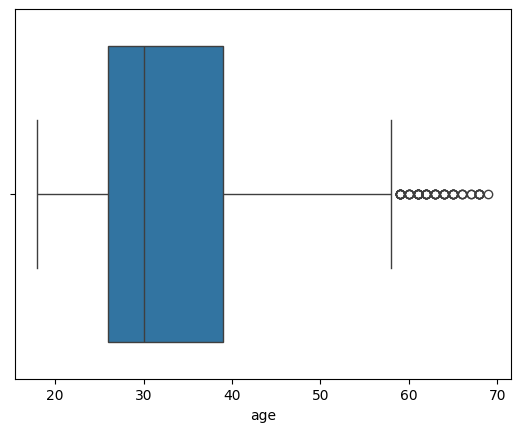

In [18]:
sns.boxplot(x=tinder_data.age);

In [52]:
# Start by creating groups based on an age criteria and orientation

tinder_data_reduced = tinder_data[tinder_data.orientation == "straight"]

In [53]:
print(tinder_data.shape)
print(tinder_data_reduced.shape)

(2001, 21)
(1736, 21)


In [54]:
# cap profiles who are over 40

tinder_data_reduced = tinder_data_reduced[tinder_data_reduced.age <= 40]

In [55]:
print(tinder_data_reduced.shape)

(1361, 21)


In [56]:
tinder_data_reduced.orientation.value_counts()

orientation
straight    1361
Name: count, dtype: int64

In [57]:
tinder_data_reduced.age.describe()

count    1361.000000
mean       28.678913
std         5.272200
min        18.000000
25%        25.000000
50%        28.000000
75%        32.000000
max        40.000000
Name: age, dtype: float64

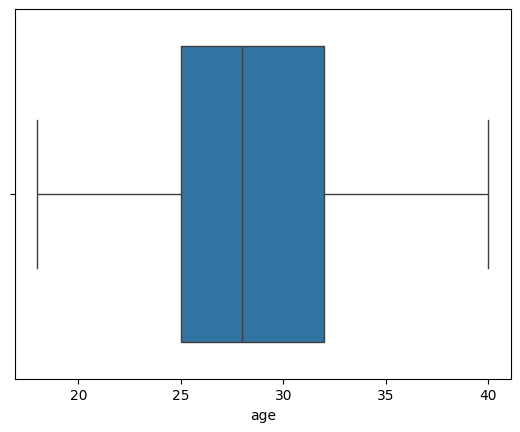

In [58]:
sns.boxplot(x=tinder_data_reduced.age);

In [59]:
list(tinder_data_reduced.select_dtypes("object"))

['user_id',
 'username',
 'status',
 'sex',
 'orientation',
 'drinks',
 'drugs',
 'job',
 'location',
 'pets',
 'smokes',
 'language',
 'new_languages',
 'body_profile',
 'dropped_out',
 'bio',
 'location_preference',
 'bio_proc']

In [60]:
tinder_data_reduced = tinder_data_reduced.set_index("user_id")
tinder_data_reduced.head()

,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference,bio_proc
user_id,,,,,,,,,,,,,,,,,,,,
fffe31003000,Eric Goldberger,28,single,m,straight,very often,sometimes,62.0,other,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",not interested,used up,4.0,no,i work and i play. hard. all day. everyday. i ...,same state,i work and i play hard all day everyday i am a...
fffe31003200,Lucile Trexler,24,single,f,straight,socially,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",interested,average,3.0,no,"so...there is much to say... for now, i'm a st...",anywhere,sothere is much to say for now i'm a student w...
fffe31003300,Earl Eells,29,single,m,straight,socially,never,73.0,education / academia,"san francisco, california",likes dogs and dislikes cats,no,english,not interested,average,3.0,no,i moved to san francisco two years ago after l...,same city,i moved to san francisco two years ago after l...
fffe31003400,Claudine Shreve,33,single,f,straight,socially,never,65.0,other,"san francisco, california",has dogs,no,"english, spanish (fluently)",not interested,a little extra,4.0,no,i'm a mixed bag of nuts! i'm outgoing yet shy ...,same city,i'm a mixed bag of nuts i'm outgoing yet shy w...
fffe31003500,Myong Ellison,39,single,f,straight,often,sometimes,65.0,medicine / health,"san francisco, california",likes dogs and has cats,no,"english (fluently), spanish (fluently)",not interested,average,4.0,no,"i'm easy-going, fun and and pretty straight fo...",same city,i'm easy-going fun and and pretty straight for...


In [61]:
# drop the username and single column - since we will not be matching on username and we only have orientation straight
tinder_data_reduced.drop(['username', 'orientation'], axis=1, inplace=True)

In [62]:
tinder_data_reduced.shape

(1361, 18)

In [63]:
tinder_data_reduced.status.value_counts()

status
single            1297
seeing someone      34
available           24
married              6
Name: count, dtype: int64

In [64]:
# only consider profiles that are single and available
tinder_data_reduced = tinder_data_reduced[tinder_data_reduced.status.isin(['single', 'available'])]

In [65]:
tinder_data_reduced.shape

(1321, 18)

In [66]:
# drop the status column, as we only have profiles that are single and available
tinder_data_reduced.drop(['status'], axis=1, inplace=True)

In [67]:
tinder_data_reduced.shape

(1321, 17)

In [68]:
tinder_data_reduced.shape

(1321, 17)

In [69]:
tinder_data_reduced.drinks.value_counts()

drinks
socially       937
rarely         139
often          129
not at all      96
very often      11
desperately      9
Name: count, dtype: int64

In [70]:
pd.get_dummies(tinder_data_reduced.drinks, prefix="drinks")
pd.concat([tinder_data_reduced, pd.get_dummies(tinder_data_reduced.drinks, prefix="drinks")], axis = 1)

,age,sex,drinks,drugs,height,job,location,pets,smokes,language,...,dropped_out,bio,location_preference,bio_proc,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often
user_id,,,,,,,,,,,,,,,,,,,,,
fffe31003000,28,m,very often,sometimes,62.0,other,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",...,no,i work and i play. hard. all day. everyday. i ...,same state,i work and i play hard all day everyday i am a...,False,False,False,False,False,True
fffe31003200,24,f,socially,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",...,no,"so...there is much to say... for now, i'm a st...",anywhere,sothere is much to say for now i'm a student w...,False,False,False,False,True,False
fffe31003300,29,m,socially,never,73.0,education / academia,"san francisco, california",likes dogs and dislikes cats,no,english,...,no,i moved to san francisco two years ago after l...,same city,i moved to san francisco two years ago after l...,False,False,False,False,True,False
fffe31003400,33,f,socially,never,65.0,other,"san francisco, california",has dogs,no,"english, spanish (fluently)",...,no,i'm a mixed bag of nuts! i'm outgoing yet shy ...,same city,i'm a mixed bag of nuts i'm outgoing yet shy w...,False,False,False,False,True,False
fffe31003500,39,f,often,sometimes,65.0,medicine / health,"san francisco, california",likes dogs and has cats,no,"english (fluently), spanish (fluently)",...,no,"i'm easy-going, fun and and pretty straight fo...",same city,i'm easy-going fun and and pretty straight for...,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003000,19,m,socially,never,73.0,student,"pacifica, california",has dogs and likes cats,no,"english (fluently), spanish (poorly), chinese ...",...,no,"hmm, i'd like to say i'm ambitious at almost e...",same city,hmm i'd like to say i'm ambitious at almost ev...,False,False,False,False,True,False
fffe3100390039003100,26,f,socially,never,65.0,student,"redwood city, california",has dogs and has cats,no,english,...,no,i'm from the sf bay area and love it here. my ...,same city,i'm from the sf bay area and love it here my s...,False,False,False,False,True,False
fffe3100390039003300,30,m,socially,never,73.0,student,"berkeley, california",likes dogs and likes cats,no,"english (fluently), german (okay)",...,no,"i've decided to re-write this whole thing, whi...",anywhere,i've decided to re-write this whole thing whic...,False,False,False,False,True,False


In [71]:
def one_hot(df, categorical_cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [72]:
tinder_data_reduced = one_hot(tinder_data_reduced, ["drinks"])
tinder_data_reduced.head()

,age,sex,drugs,height,job,location,pets,smokes,language,new_languages,...,dropped_out,bio,location_preference,bio_proc,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often
user_id,,,,,,,,,,,,,,,,,,,,,
fffe31003000,28,m,sometimes,62.0,other,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",not interested,...,no,i work and i play. hard. all day. everyday. i ...,same state,i work and i play hard all day everyday i am a...,False,False,False,False,False,True
fffe31003200,24,f,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",interested,...,no,"so...there is much to say... for now, i'm a st...",anywhere,sothere is much to say for now i'm a student w...,False,False,False,False,True,False
fffe31003300,29,m,never,73.0,education / academia,"san francisco, california",likes dogs and dislikes cats,no,english,not interested,...,no,i moved to san francisco two years ago after l...,same city,i moved to san francisco two years ago after l...,False,False,False,False,True,False
fffe31003400,33,f,never,65.0,other,"san francisco, california",has dogs,no,"english, spanish (fluently)",not interested,...,no,i'm a mixed bag of nuts! i'm outgoing yet shy ...,same city,i'm a mixed bag of nuts i'm outgoing yet shy w...,False,False,False,False,True,False
fffe31003500,39,f,sometimes,65.0,medicine / health,"san francisco, california",likes dogs and has cats,no,"english (fluently), spanish (fluently)",not interested,...,no,"i'm easy-going, fun and and pretty straight fo...",same city,i'm easy-going fun and and pretty straight for...,False,False,True,False,False,False


In [73]:
tinder_data_reduced.shape

(1321, 22)

In [74]:
# write your data frame to your data folder

tinder_data_reduced.to_csv("../data/tinder_data_reduced.csv")